### image processing basics

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
image = cv2.imread("./Cat.png") # reads image into numpy array
print(image.shape)

(858, 600, 3)


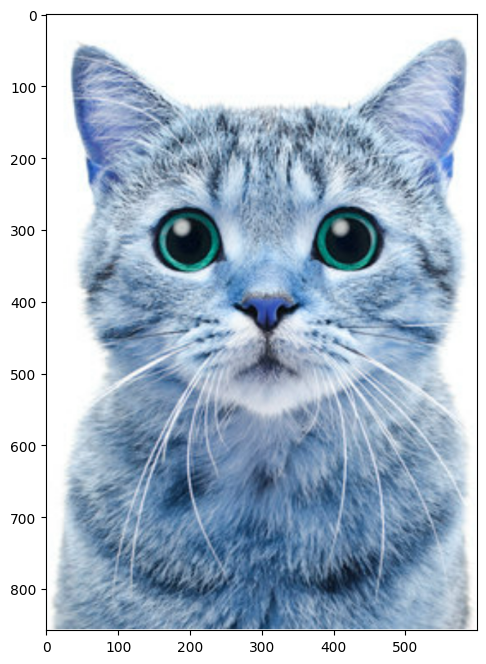

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(image) # the image is in bgr format
plt.show()

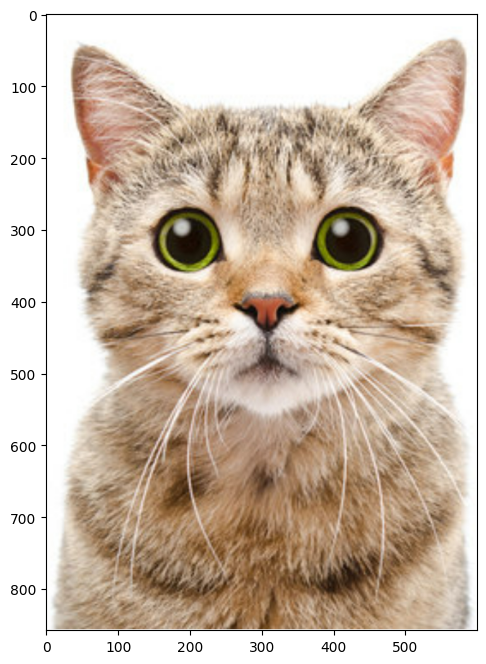

In [12]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converted bgr to rgb

plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.show()

In [13]:
print(f"min pixel value in image: {np.min(image)}")
print(f"max pixel value in image: {np.max(image)}")
print(f"mean pixel value in image: {np.mean(image)}")

min pixel value in image: 0
max pixel value in image: 255
mean pixel value in image: 177.86768712768713


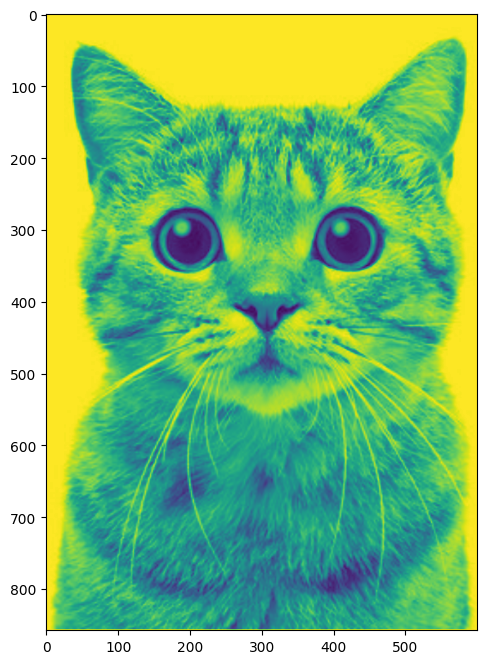

In [17]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 8))
plt.imshow(image_gray) # The default colormap in matplotlib is "viridis".
plt.show()

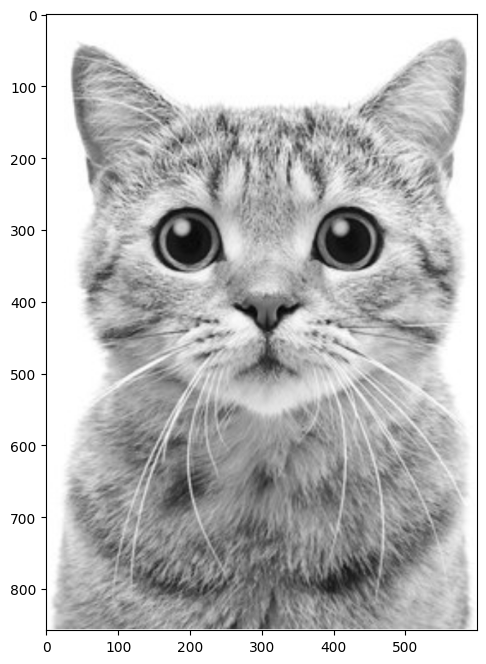

In [18]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 8))
plt.imshow(image_gray, cmap="gray")
plt.show()

In [20]:
print(f"min pixel value in gray image: {np.min(image_gray)}")
print(f"max pixel value in gray image: {np.max(image_gray)}")
print(f"mean pixel value in gray image: {np.mean(image_gray)}")
print(f"unique pixel value in gray image: {np.unique(image_gray)}")

min pixel value in gray image: 1
max pixel value in gray image: 255
mean pixel value in gray image: 181.46883255633256
unique pixel value in gray image: [  1   2   3   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210

`GaussianBlur` is used to blur image. The purpose of using `GaussianBlur` is to reduce noise and details.

`Canny` is used for detecting edges in a image.

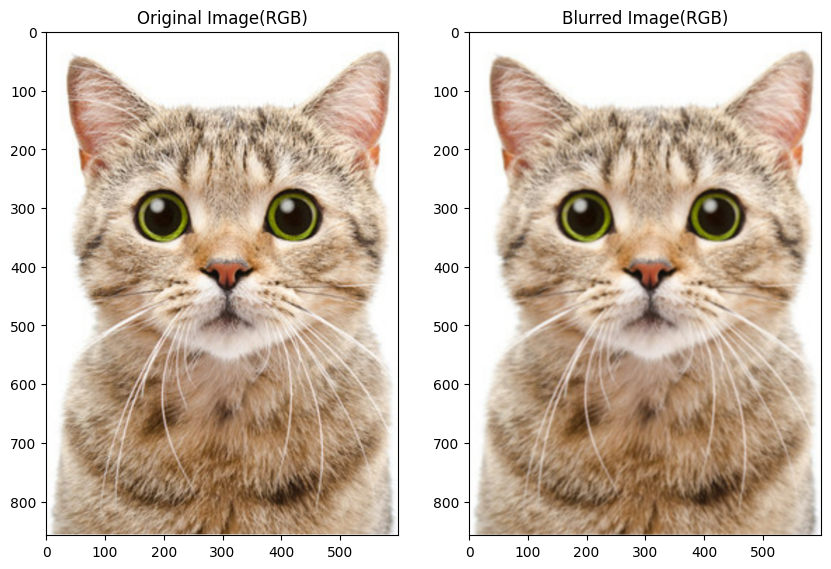

In [24]:
blur = cv2.GaussianBlur(image, ksize=(5,5), sigmaX=0)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image(RGB)")
plt.subplot(122), plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)), plt.title("Blurred Image(RGB)")
plt.show()

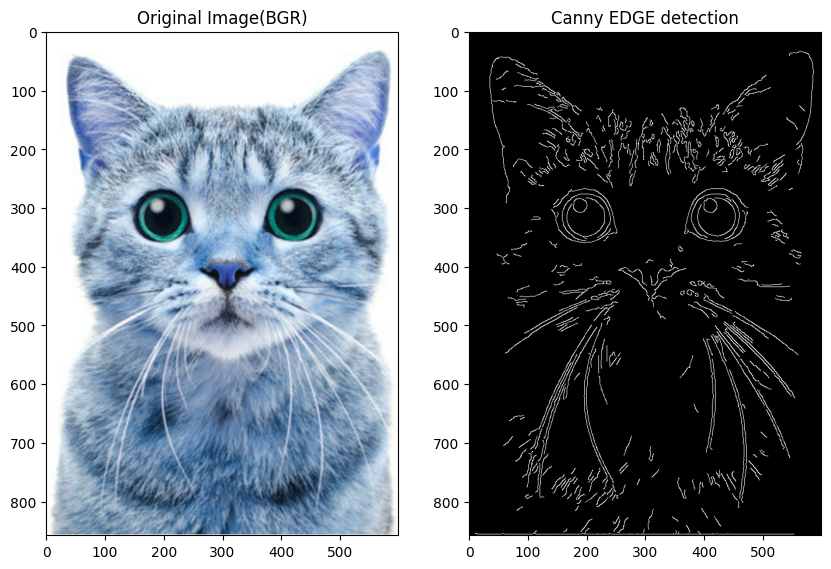

In [26]:
blur = cv2.GaussianBlur(image, (5, 5), 0)
edge = cv2.Canny(blur, 100, 200)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(image), plt.title("Original Image(BGR)")
plt.subplot(122), plt.imshow(edge, cmap="gray"), plt.title("Canny EDGE detection")
plt.show()

`Canny` Edge detection without bluring image

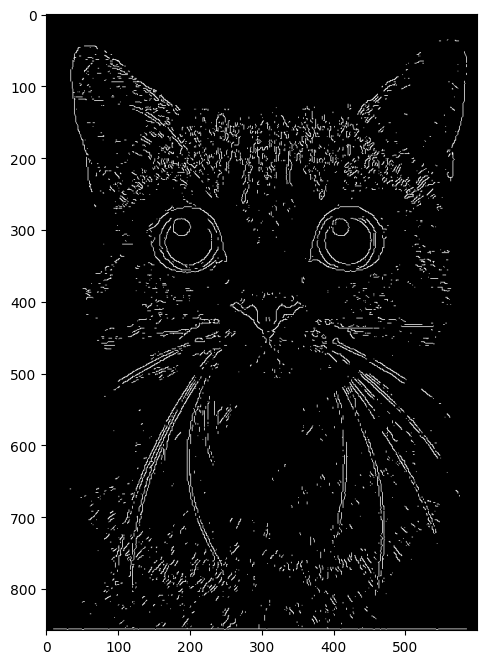

In [41]:
edge = cv2.Canny(image, 199, 200)
plt.figure(figsize=(10, 8))
plt.imshow(edge, cmap="gray")
plt.show()

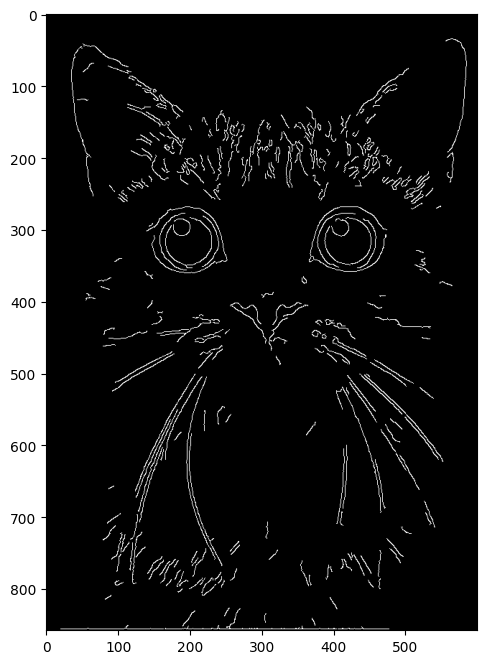

In [43]:
blurred = cv2.GaussianBlur(image_gray, (5,5), 0)
edge = cv2.Canny(blurred, 100, 200)

plt.figure(figsize=(10, 8))
plt.imshow(edge, cmap="gray")
plt.show()

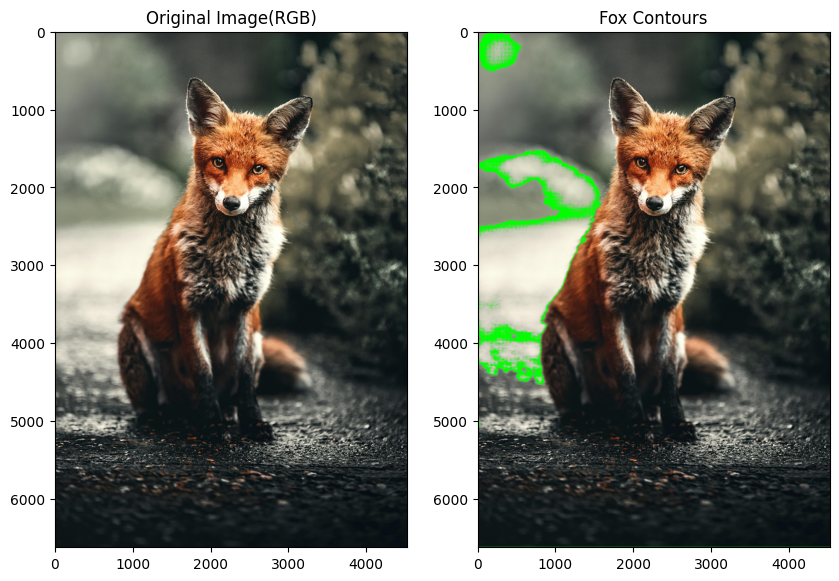

In [54]:
fox = cv2.imread("./fox.jpg")
gray_fox = cv2.cvtColor(fox, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray_fox, 150, 255, cv2.THRESH_BINARY_INV)
contour, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
fox_copy = fox.copy()

cv2.drawContours(image=fox_copy, contours=contour, contourIdx=-1, color=(0, 255, 0), thickness=3)
plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(fox, cv2.COLOR_BGR2RGB)), plt.title("Original Image(RGB)")
plt.subplot(122), plt.imshow(cv2.cvtColor(fox_copy, cv2.COLOR_BGR2RGB)), plt.title("Fox Contours")
plt.show()

(858, 600, 3)


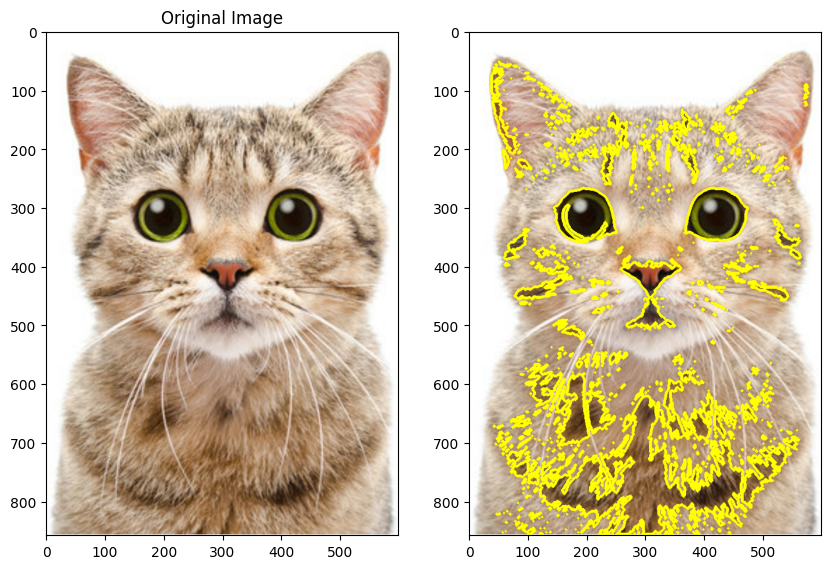

In [56]:
image = cv2.imread("./Cat.png")
print(image.shape)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)
contour, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
copy_countour_image = image.copy()
cv2.drawContours(image=copy_countour_image, contours=contour, contourIdx=-1, color=(0, 255, 255), thickness=3)

plt.figure(figsize=(10, 8))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.subplot(122), plt.imshow(cv2.cvtColor(copy_countour_image, cv2.COLOR_BGR2RGB))
plt.show()

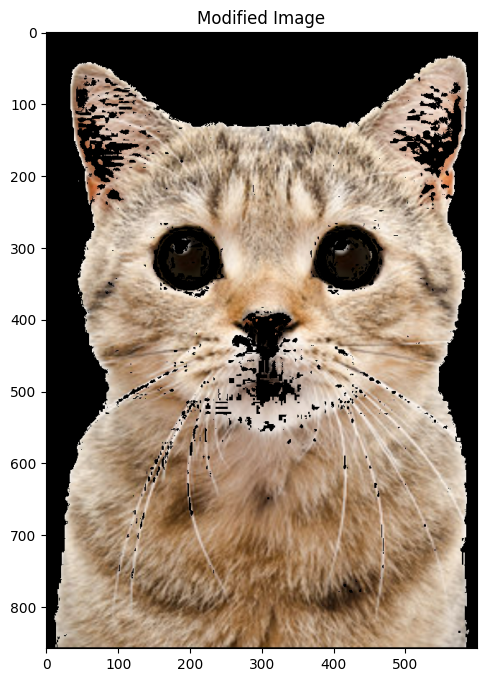

In [58]:
image = cv2.imread("./Cat.png")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_area = np.array([10, 10, 10])
upper_area = np.array([20, 255, 255])

image_mask = cv2.inRange(hsv_image, lower_area, upper_area)
segment_image = cv2.bitwise_and(image, image, mask=image_mask)

plt.figure(figsize=(10, 8))
plt.plot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.plot(122), plt.imshow(cv2.cvtColor(segment_image, cv2.COLOR_BGR2RGB)), plt.title("Modified Image")
plt.show()

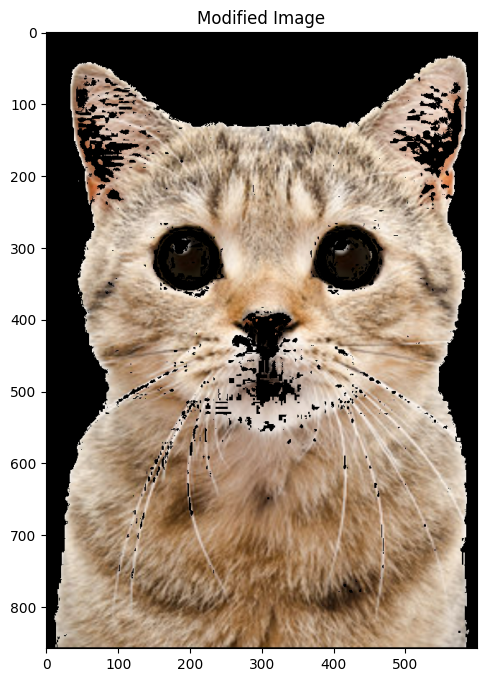

In [59]:
image = cv2.imread("./Cat.png")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_area = np.array([10, 10, 10])
upper_area = np.array([20, 255, 255])

image_mask = cv2.inRange(hsv_image, lower_area, upper_area)
segment_image = cv2.bitwise_or(image, image, mask=image_mask)

plt.figure(figsize=(10, 8))
plt.plot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
plt.plot(122), plt.imshow(cv2.cvtColor(segment_image, cv2.COLOR_BGR2RGB)), plt.title("Modified Image")
plt.show()

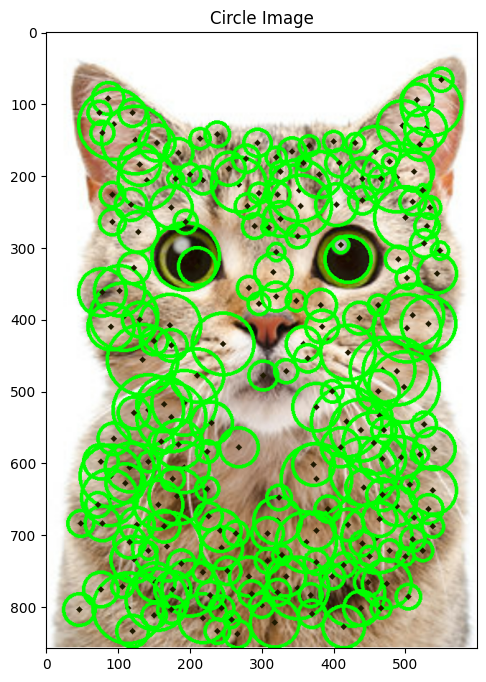

In [63]:
image = cv2.imread("./Cat.png") # bgr
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(grayimage, (5, 5), 0)
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius = 0, maxRadius=50)


if circles is not None:
  circles = np.uint16(np.around(circles))
  for i in circles[0,:]:
      cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 3)
      cv2.circle(image, (i[0], i[1]), 2, (0, 25, 30), 3)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Circle Image")
plt.show()

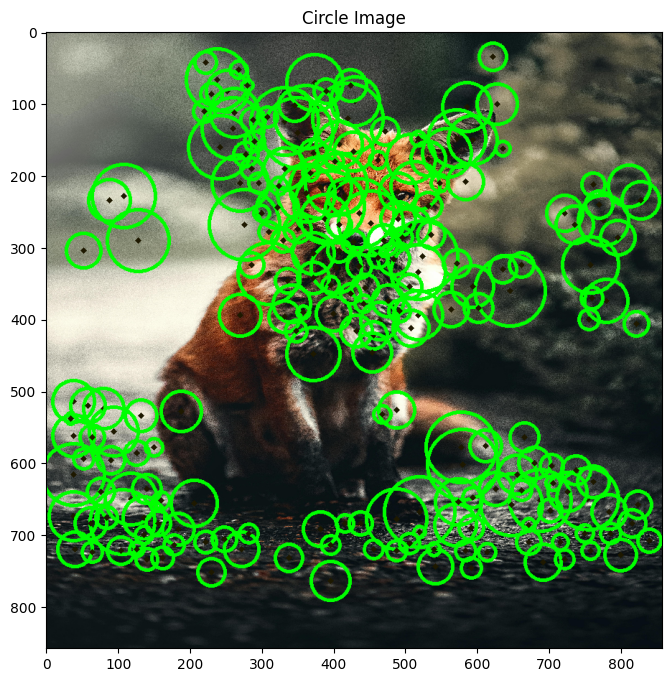

In [68]:
image = cv2.imread("./fox.jpg") # bgr
image = cv2.resize(image, (858, 858))
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(grayimage, (5, 5), 0)
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius = 0, maxRadius=50)


if circles is not None:
  circles = np.uint16(np.around(circles))
  for i in circles[0,:]:
      cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 3)
      cv2.circle(image, (i[0], i[1]), 2, (0, 25, 30), 3)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Circle Image")
plt.show()

Histogram Equalization

(<Axes: title={'center': 'Gray Image'}>,
 Text(0.5, 1.0, 'Gray Image'))

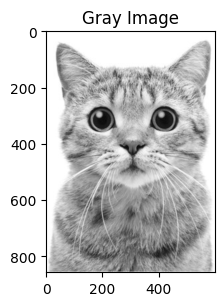

In [69]:
image = cv2.imread("./Cat.png")
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur_gray_img = cv2.GaussianBlur(gray_image, (5, 5), 0)
hist = cv2.calcHist([blur_gray_img], [0], None, [256], [0, 256])

equalized_image = cv2.equalizeHist(blur_gray_img)
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 8))
plt.subplot(141), plt.imshow(gray_img, cmap="gray"), plt.title("Gray Image")